In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
color_pal = sns.color_palette()

In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\桌面\GitHub\Big-Data-project\cabbage and weather data\new_2000_2023cabbage.csv')
df.head(3)

,dayoffset,TransDate,Crop,MarketName,Upper_Price,Middle_Price,Lower_Price,Avg_Price,Trans_Quantity,year,month,day
0,2,089/01/02,LA1 甘藍 初秋,109 台北一,11.0,8.0,5.0,8.9,"192,029",2000,1,2
1,3,089/01/03,LA1 甘藍 初秋,109 台北一,9.0,7.0,4.0,7.2,"174,270",2000,1,3
2,4,089/01/04,LA1 甘藍 初秋,109 台北一,8.0,6.0,3.0,6.7,"125,426",2000,1,4


In [3]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head(3)

,dayoffset,TransDate,Crop,MarketName,Upper_Price,Middle_Price,Lower_Price,Avg_Price,Trans_Quantity,year,month,day,datetime
0,2,089/01/02,LA1 甘藍 初秋,109 台北一,11.0,8.0,5.0,8.9,"192,029",2000,1,2,2000-01-02
1,3,089/01/03,LA1 甘藍 初秋,109 台北一,9.0,7.0,4.0,7.2,"174,270",2000,1,3,2000-01-03
2,4,089/01/04,LA1 甘藍 初秋,109 台北一,8.0,6.0,3.0,6.7,"125,426",2000,1,4,2000-01-04


In [4]:
df = df.set_index('datetime')
df.head(3)

,dayoffset,TransDate,Crop,MarketName,Upper_Price,Middle_Price,Lower_Price,Avg_Price,Trans_Quantity,year,month,day
datetime,,,,,,,,,,,,
2000-01-02,2,089/01/02,LA1 甘藍 初秋,109 台北一,11.0,8.0,5.0,8.9,"192,029",2000,1,2
2000-01-03,3,089/01/03,LA1 甘藍 初秋,109 台北一,9.0,7.0,4.0,7.2,"174,270",2000,1,3
2000-01-04,4,089/01/04,LA1 甘藍 初秋,109 台北一,8.0,6.0,3.0,6.7,"125,426",2000,1,4


<AxesSubplot: xlabel='datetime'>

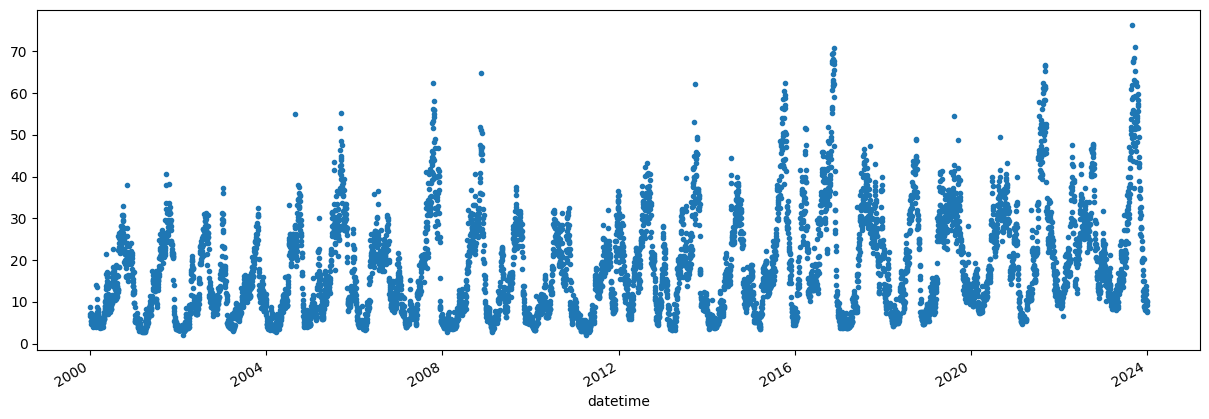

In [5]:
df['Avg_Price'].plot(style='.',figsize=(15,5),color=color_pal[0])

# 分開 train and test dataset

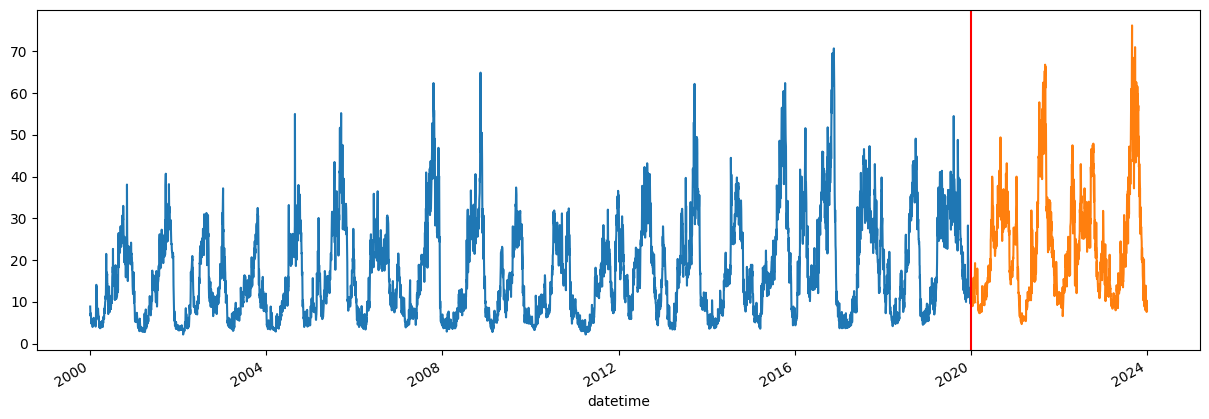

In [6]:
train = df.loc[df.index < '2020-01-01']
test = df.loc[df.index >= '2020-01-01']

fig ,ax = plt.subplots(figsize=(15,5))
train['Avg_Price'].plot(ax=ax,label="train set")
test['Avg_Price'].plot(ax=ax,label='test set')
ax.axvline('2020-01-01',color='red',ls='-')
plt.show()

<AxesSubplot: xlabel='datetime'>

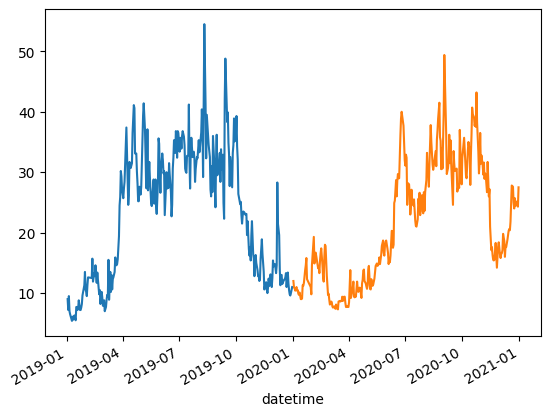

In [7]:
df.loc[(df.index > '2019-01-01') & (df.index < '2020-1-1')]['Avg_Price'].plot()
df.loc[(df.index > '2020-01-01') & (df.index < '2021-1-1')]['Avg_Price'].plot()

# create datetime feature

In [8]:
def create_feature(df):
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    return df

In [9]:
df = create_feature(df)

<AxesSubplot: xlabel='quarter', ylabel='Avg_Price'>

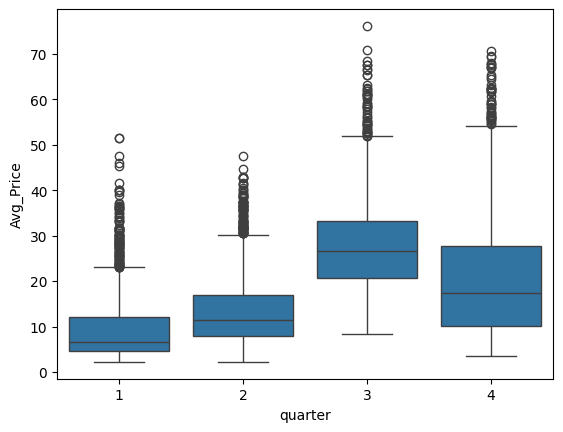

In [10]:
sns.boxplot(data=df,x='quarter',y='Avg_Price')

<AxesSubplot: xlabel='month', ylabel='Avg_Price'>

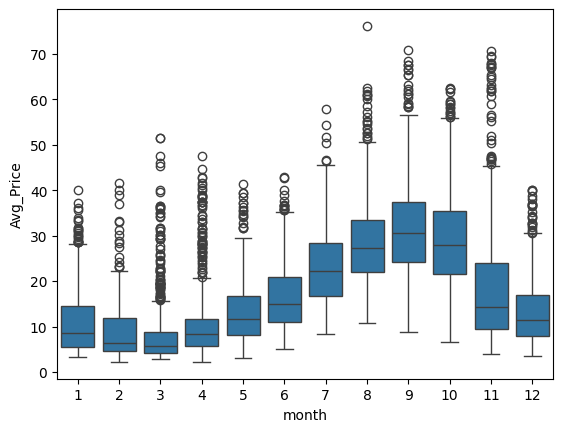

In [11]:
sns.boxplot(data=df,x='month',y='Avg_Price')

# that train and test have feature

In [12]:
train = create_feature(train)
test = create_feature(test)

C:\Users\user\AppData\Local\Temp\ipykernel_2868\453828449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\user\AppData\Local\Temp\ipykernel_2868\453828449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df.index.quarter
C:\Users\user\AppData\Local\Temp\ipykernel_2868\453828449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [13]:
train.columns

Index(['dayoffset', 'TransDate', 'Crop', 'MarketName', 'Upper_Price',
       'Middle_Price', 'Lower_Price', 'Avg_Price', 'Trans_Quantity', 'year',
       'month', 'day', 'dayofweek', 'quarter', 'dayofyear'],
      dtype='object')

In [14]:
FEATURE = ['month','dayofweek','dayofyear']
TARGET = ['Avg_Price']

In [15]:
X_train = train[FEATURE]
y_train = train[TARGET]

X_test = test[FEATURE]
y_test = test[TARGET]

In [16]:
reg = xgb.XGBRegressor(n_estimators=1000 ,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose=100
        )

[0]	validation_0-rmse:11.34613	validation_1-rmse:14.94859
[100]	validation_0-rmse:8.83504	validation_1-rmse:12.16439
[200]	validation_0-rmse:8.40799	validation_1-rmse:11.49016
[300]	validation_0-rmse:8.31338	validation_1-rmse:11.31392
[400]	validation_0-rmse:8.26310	validation_1-rmse:11.26680
[500]	validation_0-rmse:8.22750	validation_1-rmse:11.26243
[528]	validation_0-rmse:8.21749	validation_1-rmse:11.26691


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# important feature

In [17]:
reg.feature_importances_

array([0.13670614, 0.03791905, 0.82537484], dtype=float32)

In [18]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index = reg.feature_names_in_,
             columns=['important']
             )

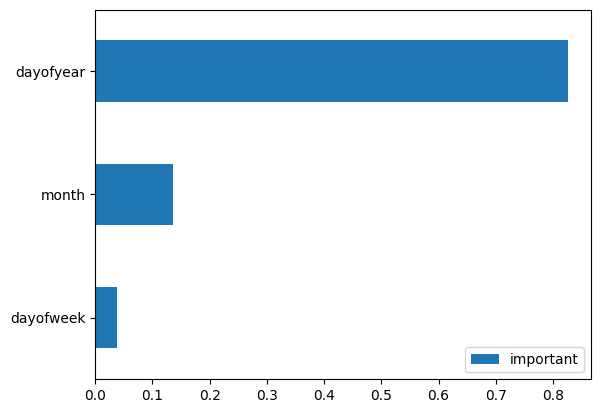

In [19]:
fi.sort_values('important').plot(kind='barh')
plt.show()

# 預測 test 資料

C:\Users\user\AppData\Local\Temp\ipykernel_2868\2057205454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


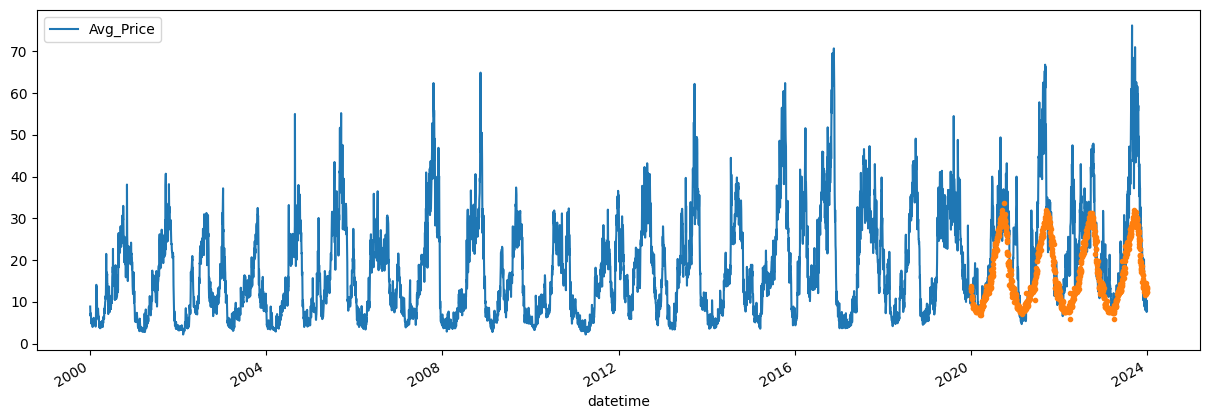

In [20]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']],how='left',left_index=True,right_index=True)

ax = df[['Avg_Price']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='.')
plt.show()

<AxesSubplot: xlabel='datetime'>

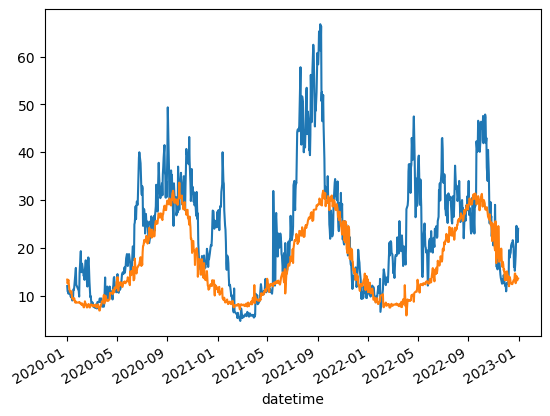

In [21]:
df.loc[(df.index > '2020-01-01') & (df.index < '2023-1-1')]['Avg_Price'].plot()
df.loc[(df.index > '2020-01-01') & (df.index < '2023-1-1')]['prediction'].plot()

In [22]:
mean_squared_error(test['prediction'],y_test)

126.82074379579556